# Student Mark Predictor

## Business Problem

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In [57]:
df = pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [58]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [59]:
df.shape

(200, 2)

## Discover the pattern and visulaize the data to gain insights

<Axes: >

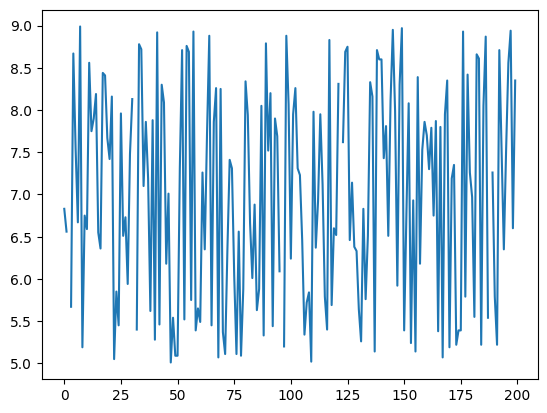

In [60]:
df['study_hours'].plot()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
# statistics summary
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


## we will visualize the scatter plot to get realtion between study_hours	student_marks columns

Text(0.5, 1.0, 'Scatter plot of Study Hour vs Student Marks')

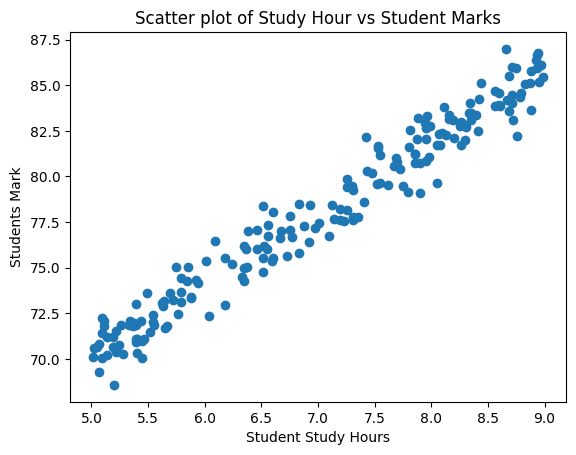

In [6]:
plt.scatter(x = df.study_hours, y =	df.student_marks)
plt.xlabel('Student Study Hours')
plt.ylabel('Students Mark')
plt.title("Scatter plot of Study Hour vs Student Marks")

In [7]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


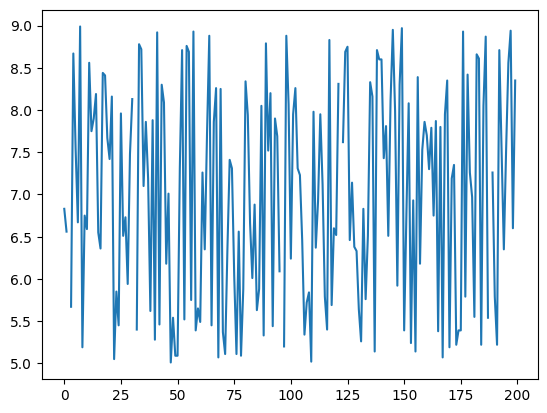

In [17]:
plt.plot(df['study_hours'])
plt.show()

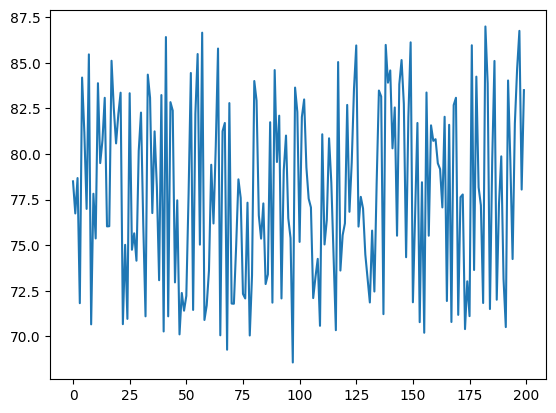

In [18]:
plt.plot(df['student_marks'])

## As we can see that this one is strongly correlated.

## prepare the data for machine learning algorithm.

In [19]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

## As we can see that There are 5 null values in study hour.
### so we will use mean strategy.

In [20]:
mean = df.mean()
mean

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [21]:
df2 = df.fillna(mean)

In [22]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [23]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [24]:
x = df2.drop("student_marks", axis = 'columns')
y = df2.drop('study_hours', axis = 'columns')
print('Shape of x :- ', x.shape)
print('Shape of y :- ', y.shape)

Shape of x :-  (200, 1)
Shape of y :-  (200, 1)


### Split the dataset in to train and test

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size= 0.20) 
print("shape of x_train :- ", x_train.shape)
print("shape of x_test :- ", x_test.shape)
print("shape of y_train :- ", y_train.shape)
print("shape of y_test :- ", y_test.shape)

shape of x_train :-  (160, 1)
shape of x_test :-  (40, 1)
shape of y_train :-  (160, 1)
shape of y_test :-  (40, 1)


## There is only 1 independent variable so we will use Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
# fit the model
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.coef_

array([[3.93037294]])

In [29]:
lr.intercept_

array([50.45063632])

In [30]:
m = 3.93
c = 50.45
y = m * 4 + c
y

66.17

In [31]:
lr.predict([[4]]).round(2)

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.17]])

In [32]:
y_pred = lr.predict(x_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [33]:
df.columns

Index(['study_hours', 'student_marks'], dtype='object')

In [34]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ['study_hours', 'student_marks_original', 'student_marks_prediction'])

,study_hours,student_marks_original,student_marks_prediction
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


## Tune your model

In [35]:
lr.score(x_test, y_test)

0.9521841793508594

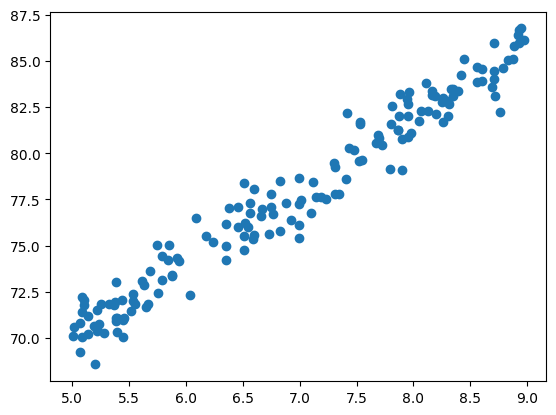

In [36]:
plt.scatter(x_train, y_train)

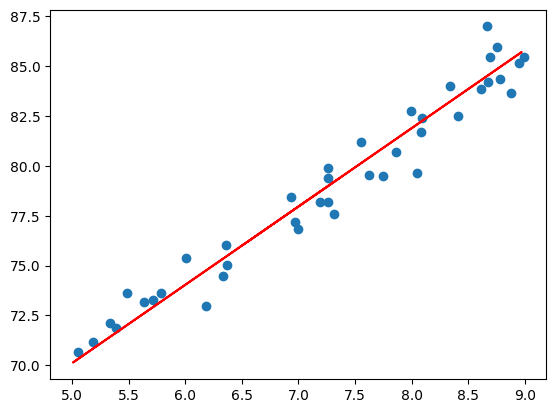

In [37]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'r')

# Save your Model

In [38]:
import joblib
joblib.dump(lr, 'student_mark_prediction.pkl')

['student_mark_prediction.pkl']

In [39]:
model = joblib.load('student_mark_prediction.pkl')

In [40]:
model.predict([[5]])

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.102501]])

In [42]:
model.predict([[12]])

c:\Users\AkshatRaj\End to end Projects\Student mark predictor\.mark_prediction\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[97.61511155]])

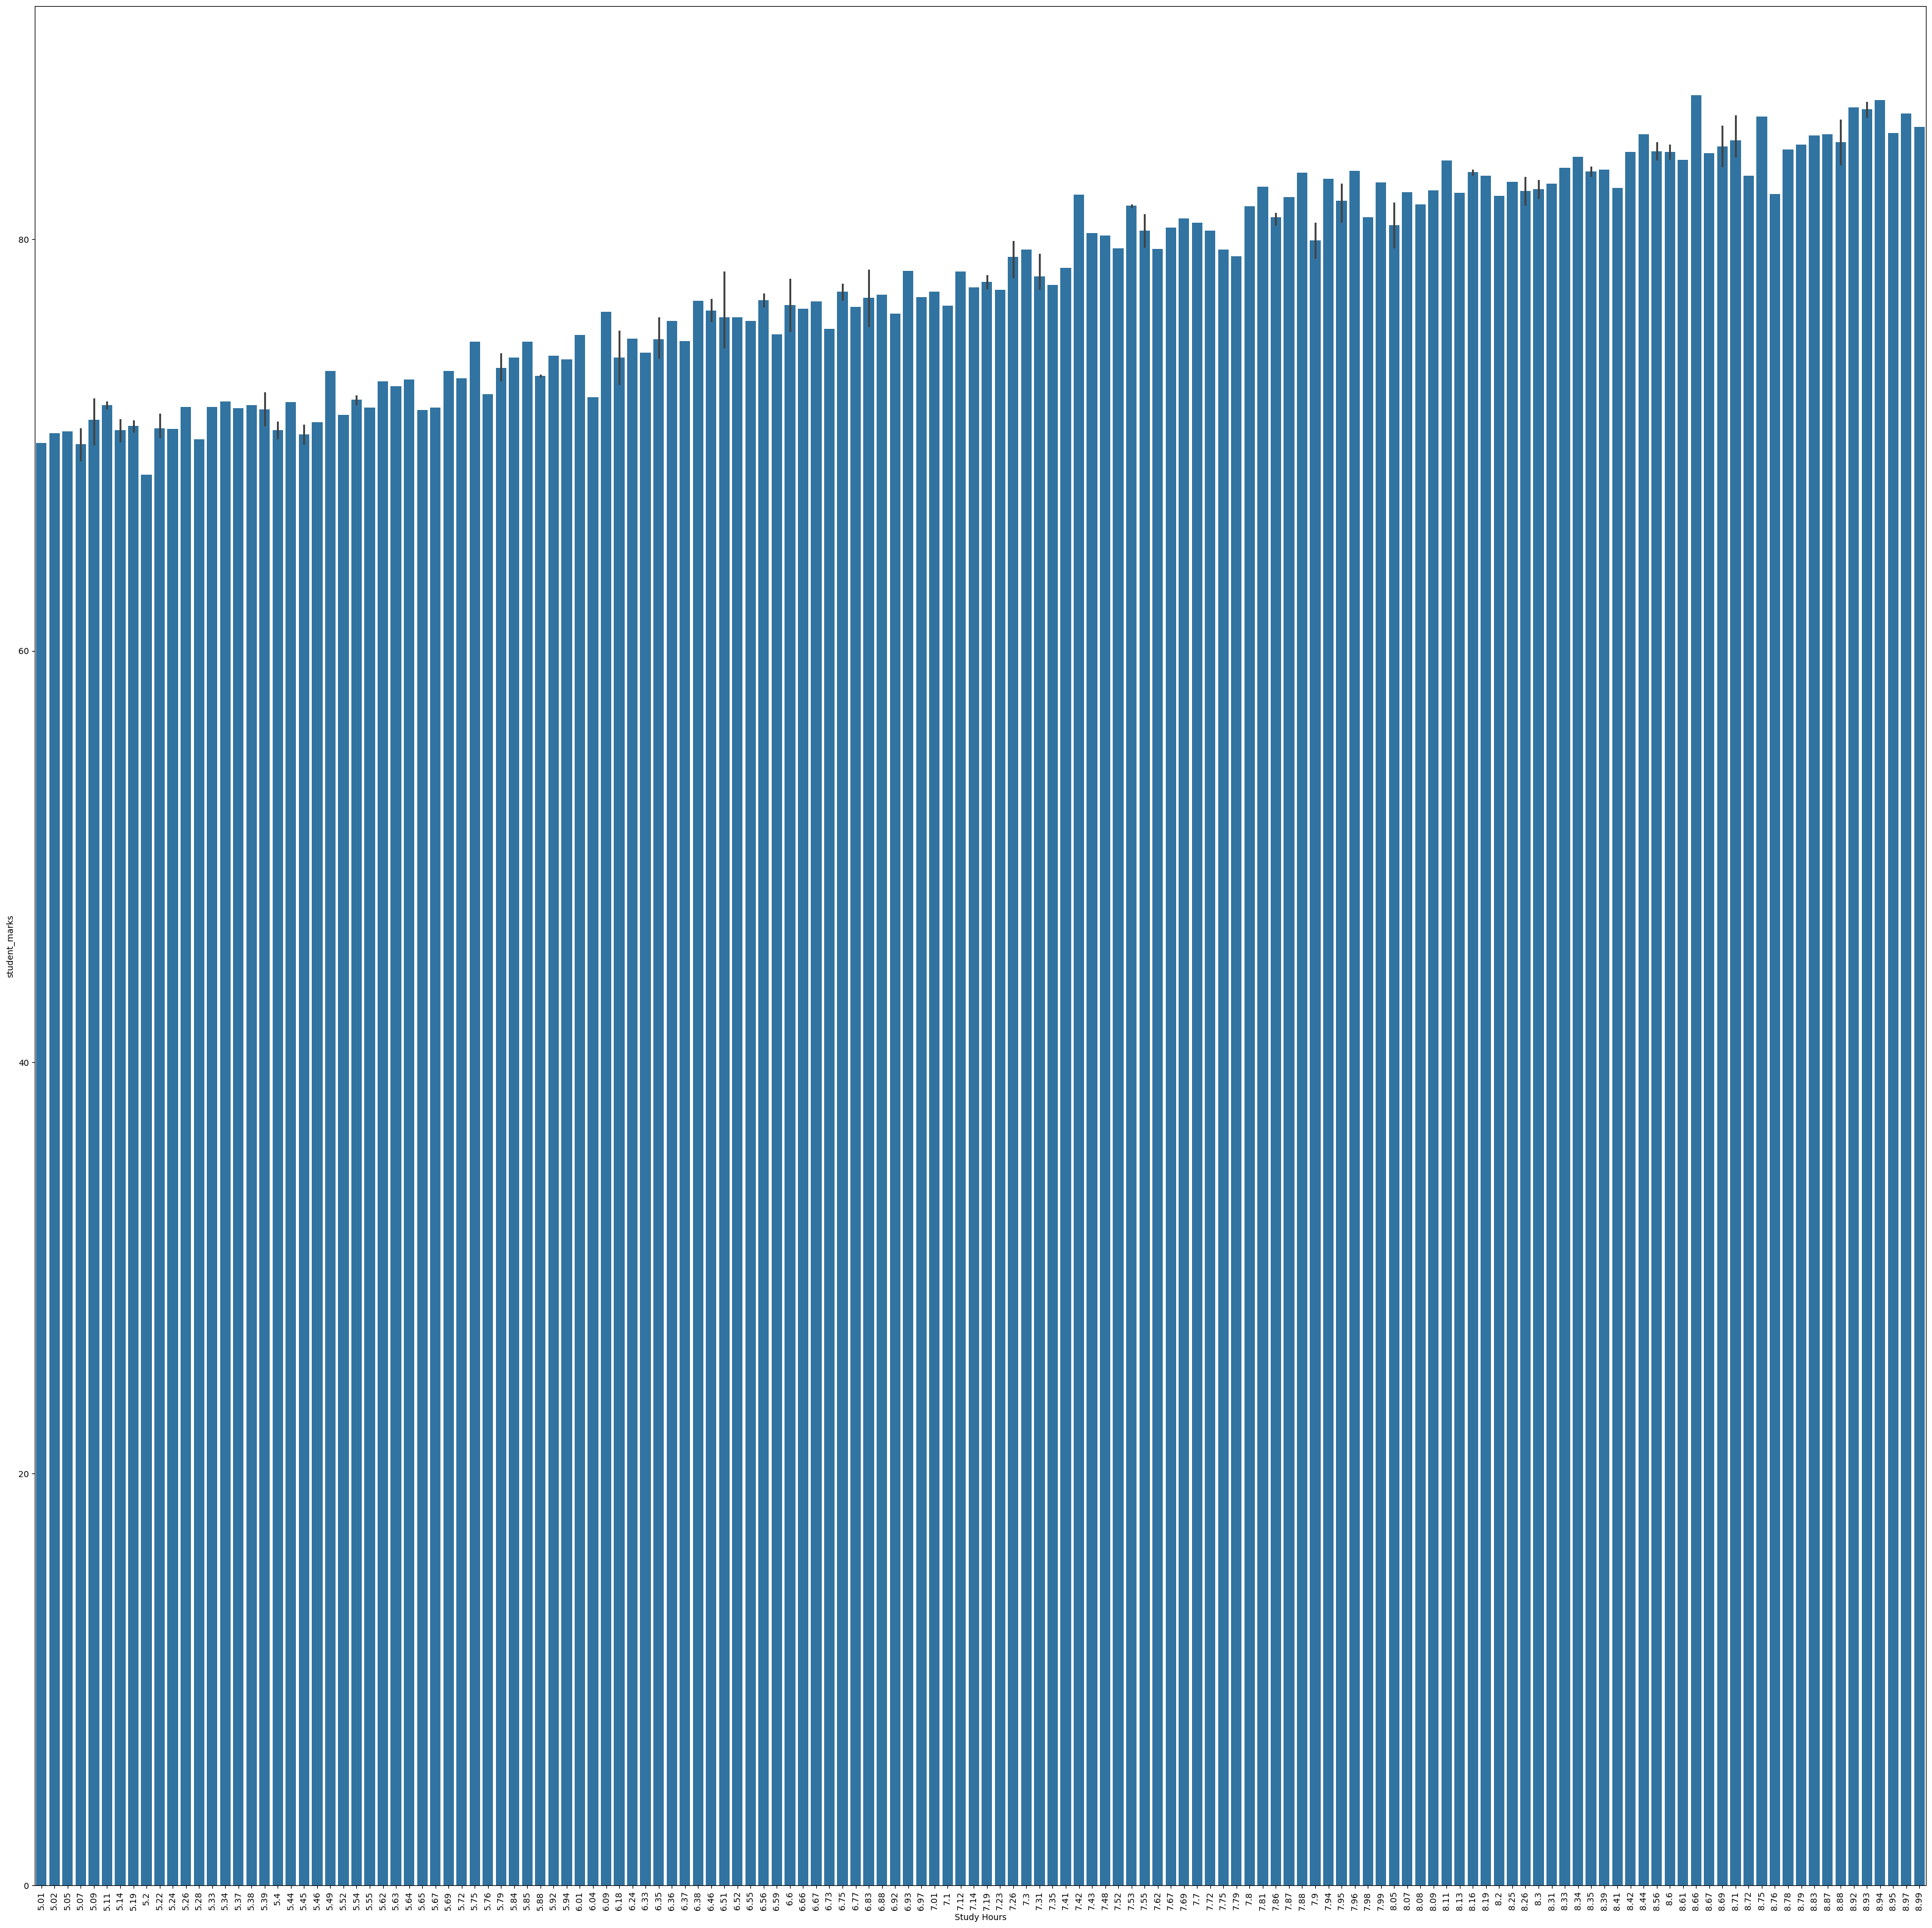

In [48]:
plt.figure(figsize=(40, 40))
import seaborn as sns
sns.barplot(x = df['study_hours'], y = df['student_marks'])
plt.xlabel('Study Hours')
plt.xticks(rotation =90)

plt.show()

In [49]:
lis1 = df['study_hours']
lis2 = df['student_marks']

In [50]:
lis1

0      6.83
1      6.56
2       NaN
3      5.67
4      8.67
       ... 
195    7.53
196    8.56
197    8.94
198    6.60
199    8.35
Name: study_hours, Length: 200, dtype: float64

In [54]:
df.columns

Index(['study_hours', 'student_marks'], dtype='object')

In [56]:
input_features = np.array([df['study_hours'], df['student_marks']])
input_features[0][0]

6.83

In [ ]:
model.predict([input_features])